In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### GAN Model
- Generator : Latent Points로 부터 Fake 데이터 생성 모델
- Discriminator : Generator로 부터 생성된 Fake데이터와 실제 데이터를 구분하는 모델
- GAN : Generator와 Discriminator를 결합한 모델, Generator의 가중치만 업데이트하며 Discriminator의 가중치는 업데이트 x

Latent Points -> Generator -> Fake Data  + Real Data -> Discriminator(가중치 업데이트) -> GAN(Generator의 가중치만 업데이트)

In [5]:
# Generator 모델 생성
# latent_points를 Fake 데이터로 생성
def define_generator(latent_dim, out_dim= 2):
    input_layer = tf.keras.Input(shape=(latent_dim))
    dense_layer = tf.keras.layers.Dense(15, activation = 'relu')(input_layer)
    output_layer = tf.keras.layers.Dense(out_dim, activation = 'linear')(dense_layer)
    generator_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
    return generator_model

In [6]:
# Discriminator
# 실제 데이터와 Generator로부터 생성된 Fake 데이터를 구분하는 모델
def define_discriminator(input_dim= 2):
    input_layer = tf.keras.Input(shape=(input_dim))
    dense_layer = tf.keras.layers.Dense(25, activation = 'relu')(input_layer)
    output_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')(dense_layer)
    discriminator_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
    #     compile model
    discriminator_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return discriminator_model

In [7]:
# Generator + Discriminator
# Discriminator는 여기서 학습하지 않음 -> Generator만 업데이트
def define_gan(generator, discriminator):
    #     make weights in the discriminator not trainable
    discriminator.trainable = False
    #     connect them
    model = tf.keras.Sequential()
    #     add generator
    model.add(generator)
    #     add the discriminator
    model.add(discriminator)
    #     compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

### 데이터 생성
- Sample Real Data
- Latent Points
- Fake Data

In [ ]:
# latent_points Data 생성
# 정규분포로 데이터 생성
def generate_latent_points(latent_dim, n):
    #     generate points in the latent space
    z_input = np.random.randn(latent_dim * n)
    #     reshape into a batch of inputs for the network
    z_input = z_input.reshape(n, latent_dim)
    return z_input

In [ ]:
# Latent Points와 Generator로 부터 Fake 데이터 생성
# Y = 0
def generate_fake_samples(generator, latent_dim, n):
    #     generate points in latent space
    z_input = generate_latent_points(latent_dim, n)
    #     predict outputs
    x = generator.predict(z_input, verbose=0)
    #     create class labels
    y = np.zeros((n, 1))
    return x, y

In [8]:
# Real Sample Data 생성
# Y = 1
def generate_real_samples(n):
    #     generate inputs in [-0.5, 0.5]*2.*pi
    p = (np.random.rand(n) - 0.5)*2.*np.pi
    #     generate outputs sin(x)
    q = np.sin(p)
    #     stack arrays
    p = p.reshape(n, 1)
    q = q.reshape(n, 1)
    x = np.hstack((p, q))
    #     generate class labels
    y = np.ones((n, 1))
    return x, y

In [10]:
#     size of the latent space
latent_dim = 10
#     create the discriminator
discriminator = define_discriminator()
#     create the generator
generator = define_generator(latent_dim)
#     create the GAN
gan_model = define_gan(generator, discriminator)

In [11]:
n_epochs=100000
n_batch=128
n_eval=2000

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

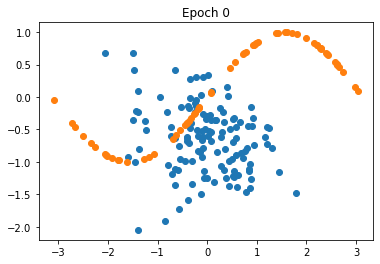

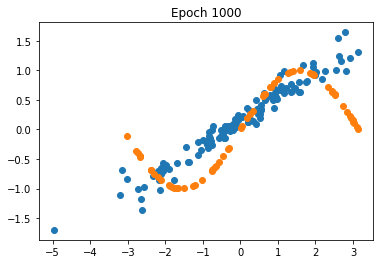

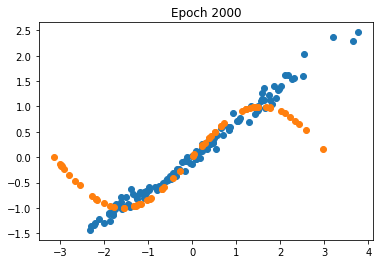

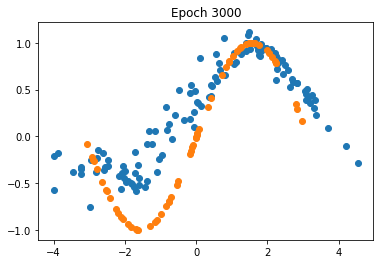

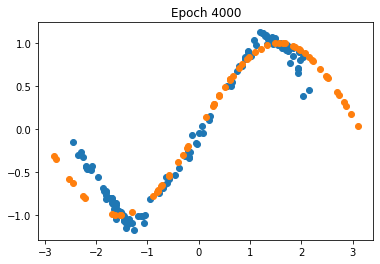

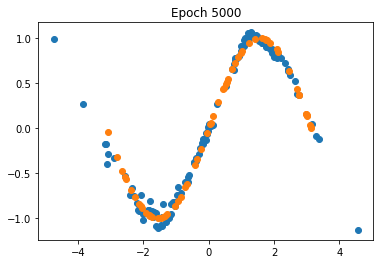

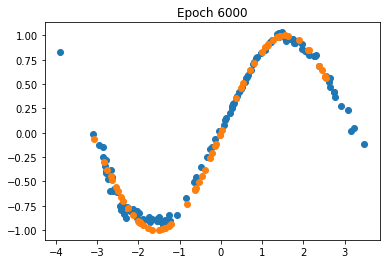

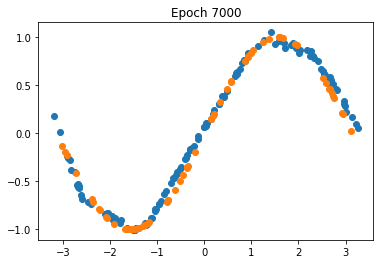

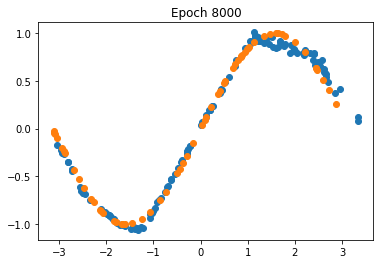

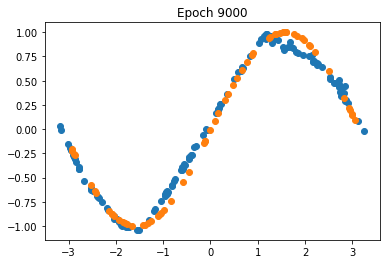

In [12]:
half_batch = int(n_batch / 2)
#    manually enumerate epochs
# for i in range(1):
for i in range(10000):
        #     prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        #     prepare fake examples
        x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
        
        x = np.append(x_real,x_fake, axis = 0)
        y = np.append(y_real,y_fake, axis = 0)
        #     update discriminator

        discriminator.train_on_batch(x,y)
        #     prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        #     create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1)) # Y를 모두 1로 지정
        #     update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        
        if i%1000 == 0:
            # True Data
            true, _ = generate_real_samples(half_batch)
            # Fake Data
            x_gan = generate_latent_points(latent_dim, n_batch)
            pred = generator.predict(x_gan, verbose=0)
            
            plt.plot(pred[:,0],pred[:,1], marker = 'o', linestyle = '')
            plt.plot(true[:,0],true[:,1], marker = 'o', linestyle = '')
            plt.title(f'Epoch {i}')
            plt.show()